## Passenger Satisfaction 2024
What factors lead to customer satisfaction for an Airline?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from itertools import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch
import datetime as dt

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"julsfeo","key":"2740d1ecf507382a6d7b7a142bdf5aed"}'}

In [3]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle competitions download -c passenger-satisfaction-2024

In [5]:
! unzip passenger-satisfaction-2024.zip -d passenger-satisfaction

Archive:  passenger-satisfaction-2024.zip
  inflating: passenger-satisfaction/sample_submit.csv  
  inflating: passenger-satisfaction/test.csv  
  inflating: passenger-satisfaction/train.csv  


In [15]:
df = pd.read_csv('/content/passenger-satisfaction/test.csv')

df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,98190,Female,46,First-time,Business,Economy,978,0,8.0,3,...,1,4,5,4,5,5,1,3,5,2
1,107961,Female,21,First-time,Business,Economy,1005,0,20.0,1,...,3,3,4,4,4,4,4,1,4,4
2,129503,Female,39,Returning,Personal,Economy,954,18,3.0,5,...,2,4,5,3,3,3,5,1,3,5
3,92408,Male,22,Returning,Personal,Business,765,0,0.0,5,...,3,5,2,2,2,2,5,2,2,5
4,117611,Male,48,Returning,Business,Business,2123,9,0.0,4,...,4,2,4,2,3,1,2,2,2,2


In [16]:
df.dtypes

,0
ID,int64
Gender,object
Age,int64
Customer Type,object
Type of Travel,object
Class,object
Flight Distance,int64
Departure Delay,int64
Arrival Delay,float64
Departure and Arrival Time Convenience,int64


In [17]:
df.isnull().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,131
Departure and Arrival Time Convenience,0


In [18]:
df = df.drop('Arrival Delay', axis = 1)

In [19]:
df['Customer Type'] = df['Customer Type'].replace({'Returning': 1, 'First-time': 0})
df['Class'] = df['Class'].replace({'Business': 2, 'Economy': 0, 'Economy Plus': 1})
df['Type of Travel'] = df['Type of Travel'].replace({'Business' : 1, 'Personal' : 0})
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

<ipython-input-19-aa55236afd2e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Customer Type'] = df['Customer Type'].replace({'Returning': 1, 'First-time': 0})
<ipython-input-19-aa55236afd2e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class'] = df['Class'].replace({'Business': 2, 'Economy': 0, 'Economy Plus': 1})
<ipython-input-19-aa55236afd2e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84967 entries, 0 to 84966
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ID                                      84967 non-null  int64 
 1   Gender                                  84967 non-null  int64 
 2   Age                                     84967 non-null  int64 
 3   Customer Type                           84967 non-null  int64 
 4   Type of Travel                          84967 non-null  int64 
 5   Class                                   84967 non-null  int64 
 6   Flight Distance                         84967 non-null  int64 
 7   Departure Delay                         84967 non-null  int64 
 8   Departure and Arrival Time Convenience  84967 non-null  int64 
 9   Ease of Online Booking                  84967 non-null  int64 
 10  Check-in Service                        84967 non-null  int64 
 11  On

<Axes: >

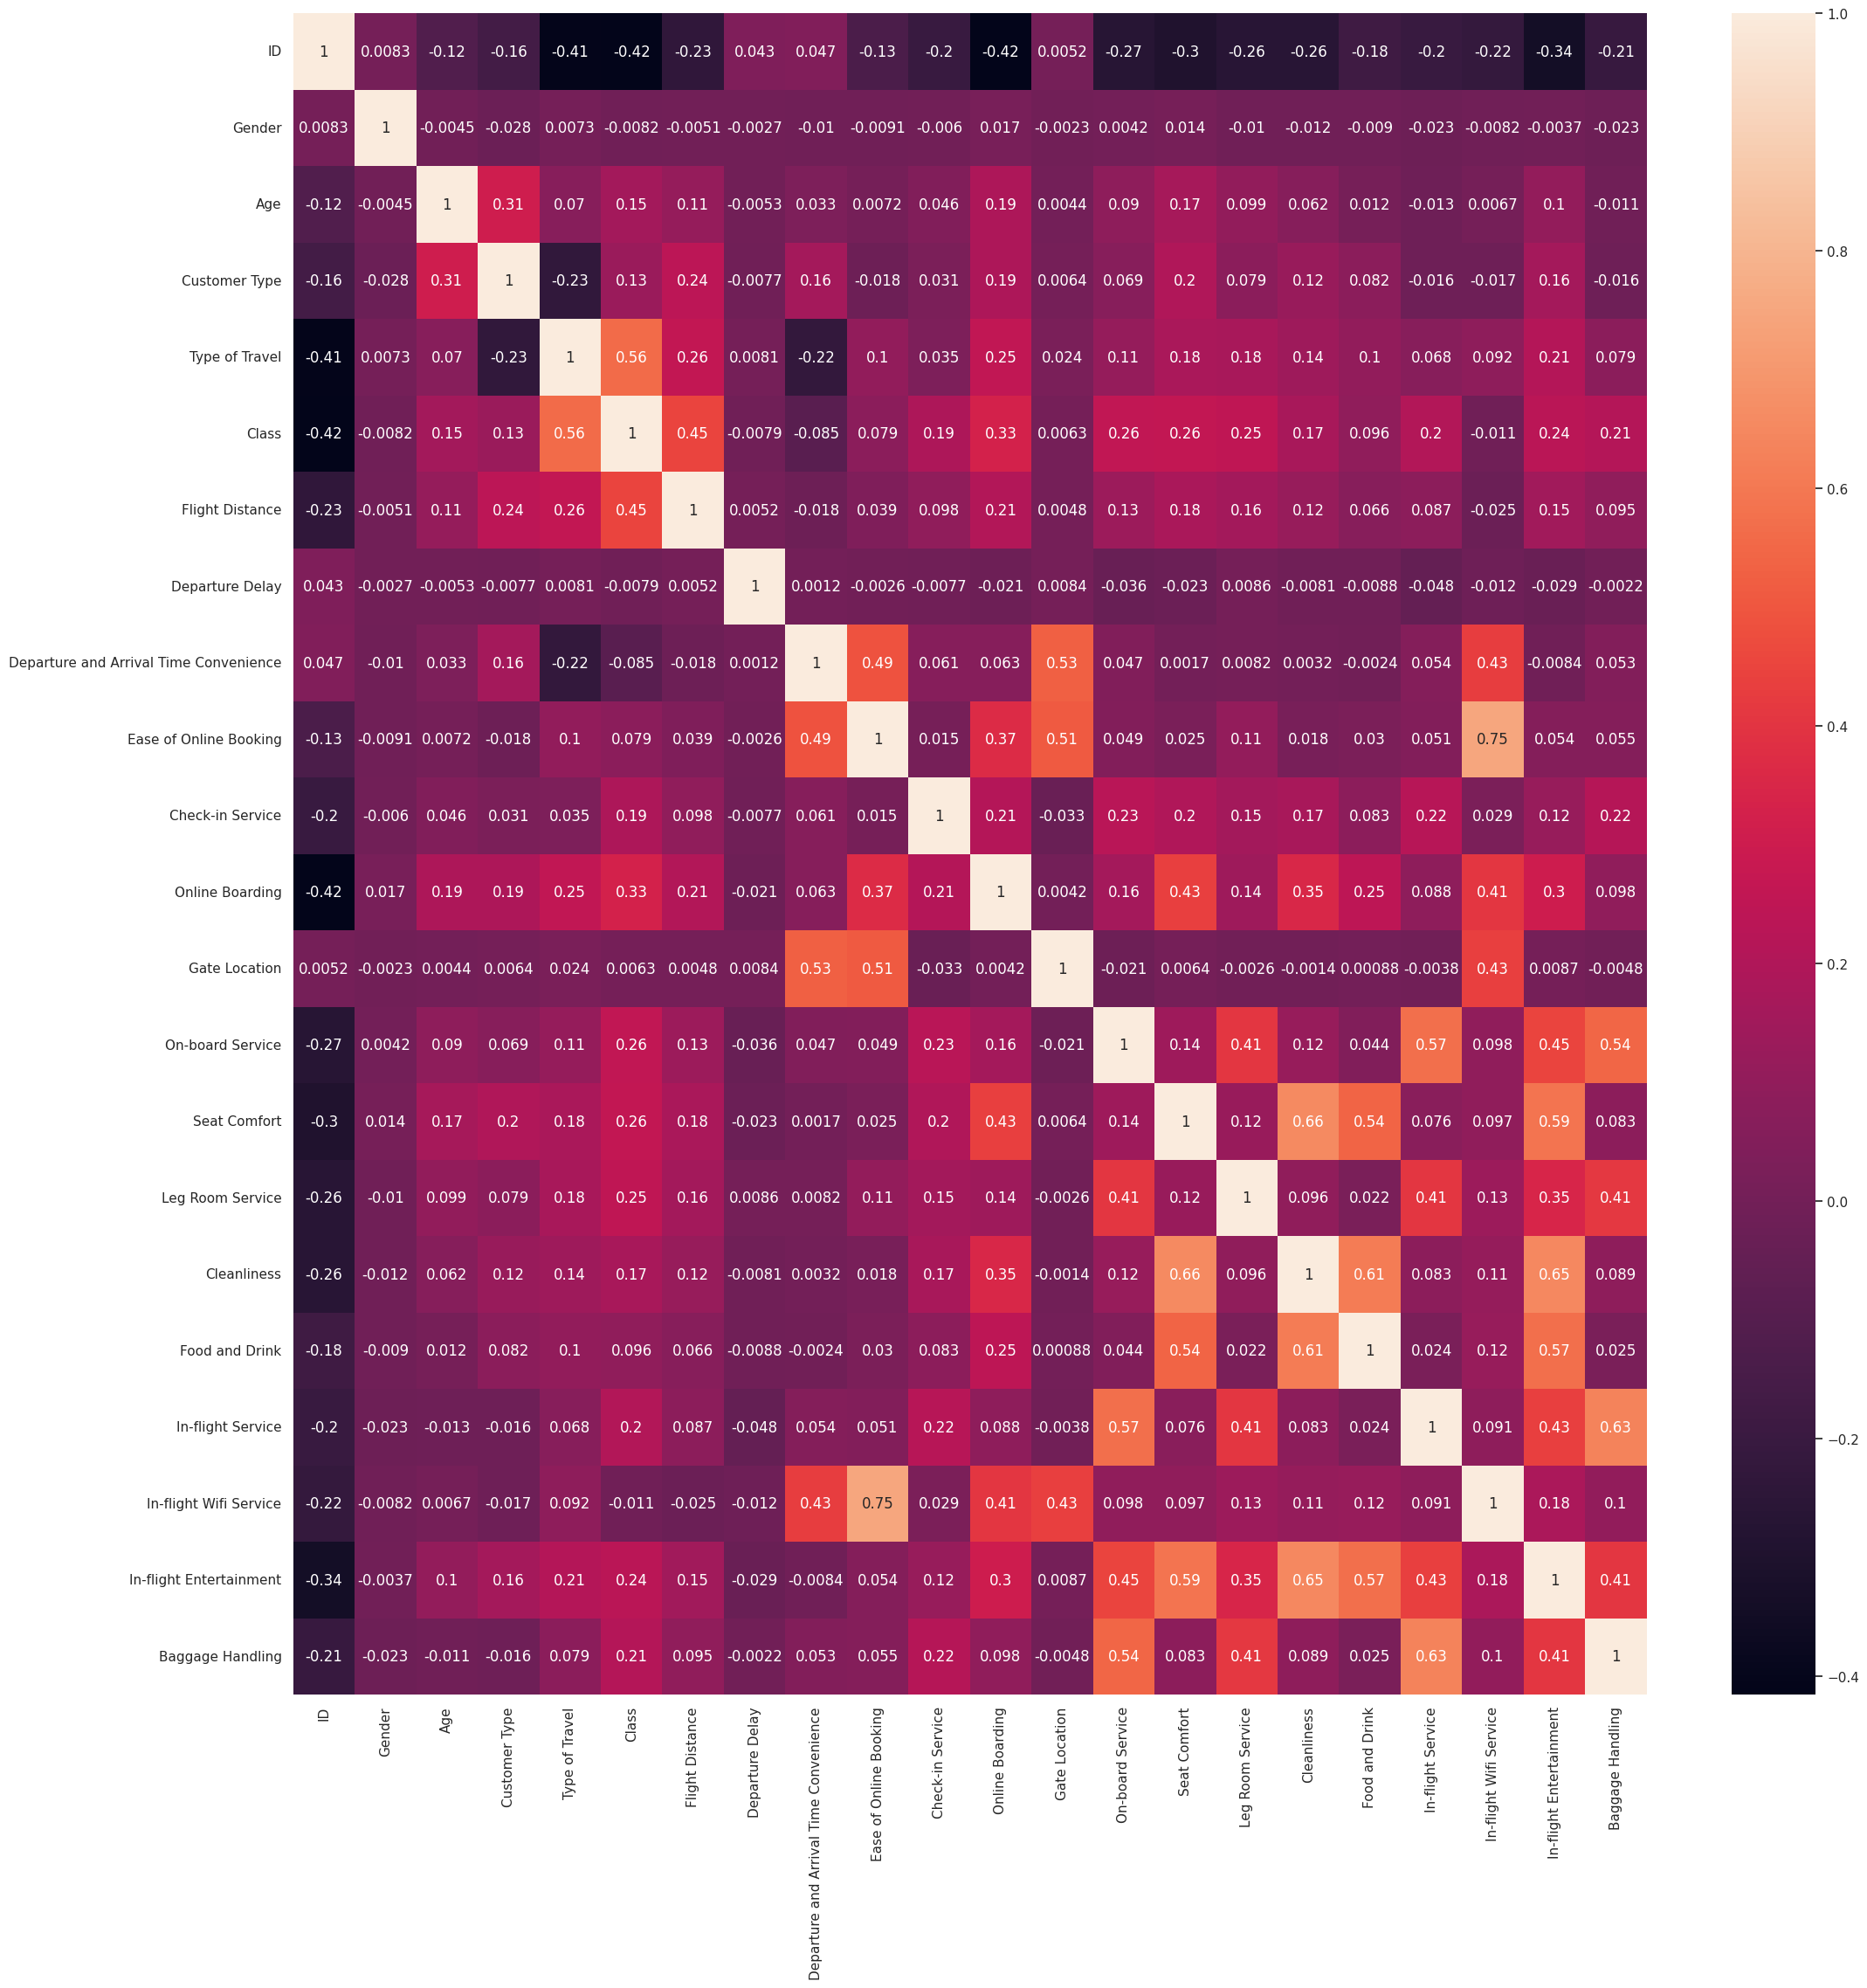

In [12]:
import seaborn as sns
df1 = df.drop('Satisfaction', axis = 1)
corr = df1.corr()
sns.set_theme(rc={'figure.figsize':(25,25)})
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [13]:
from sklearn.utils import resample

label_encoder = LabelEncoder()
df['Satisfaction'] = label_encoder.fit_transform(df['Satisfaction'])
df_satisfied = df[df['Satisfaction'] == 1]
df_neutral_or_dissatisfied = df[df['Satisfaction'] == 0]

min_class_size = min(len(df_satisfied), len(df_neutral_or_dissatisfied))

df_satisfied_downsampled = resample(df_satisfied,
                                    replace=False,
                                    n_samples=min_class_size,
                                    random_state=42)

df_neutral_or_dissatisfied_downsampled = resample(df_neutral_or_dissatisfied,
                                                  replace=False,
                                                  n_samples=min_class_size,
                                                  random_state=42)


df_balanced = pd.concat([df_satisfied_downsampled, df_neutral_or_dissatisfied_downsampled])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [14]:
df_balanced.to_csv('preprocessed_train.csv')

In [20]:
df.to_csv('preprocessed_test.csv')

In [21]:
df_train = pd.read_csv('preprocessed_train.csv')

X_train = df_train.drop(['ID', 'Satisfaction', 'In-flight Wifi Service'], axis=1)
Y = df_train['Satisfaction']

Y.head()

,Satisfaction
0,0
1,1
2,1
3,0
4,0


In [22]:
df_test = pd.read_csv('preprocessed_test.csv')

X_test = df_test.drop(['ID', 'In-flight Wifi Service'], axis = 1)

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

stdX = StandardScaler()

X_train_std = stdX.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)

X_test_std = stdX.transform(X_test)

In [24]:
xx_train, xx_test, yy_train, yy_test = train_test_split(X_train_std, Y, test_size=0.4, random_state=33)

In [25]:
# X_train_tensor = torch.tensor(X_train_std, dtype=nn.float32)
# Y_tensor = torch.tensor(Y_std, dtype=nn.float32)
# X_test_tensor = torch.tensor(X_test_std, dtype=nn.float32)

class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype = torch.float32)
        self.y = torch.tensor(y.to_numpy(), dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, index):
        return (self.X[index], self.y[index])

In [26]:
relu = nn.ReLU()

class Net(nn.Module):
    def __init__(self, input_size, n_hidden_neurons):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, n_hidden_neurons)
        self.fc2 = nn.Linear(n_hidden_neurons, n_hidden_neurons * 2)
        self.fc3 = nn.Linear(n_hidden_neurons * 2, n_hidden_neurons)
        self.fc4 = nn.Linear(n_hidden_neurons, n_hidden_neurons // 2)
        self.fc5 = nn.Linear(n_hidden_neurons // 2, 1)

        self.bn1 = nn.BatchNorm1d(n_hidden_neurons)
        self.bn2 = nn.BatchNorm1d(n_hidden_neurons * 2)
        self.bn3 = nn.BatchNorm1d(n_hidden_neurons)
        self.bn4 = nn.BatchNorm1d(n_hidden_neurons // 2)

        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)

        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)

        x = self.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)

        x = self.relu(self.bn4(self.fc4(x)))
        x = self.dropout(x)

        x = torch.sigmoid(self.fc5(x))
        return x.view(-1)


net = Net(input_size=X_train.shape[1], n_hidden_neurons = 256)

In [27]:
class Trainer():
    """
    Parameters:
        dataset: класс, хранящий данные
        loss_f: функция потерь
        learning_rate: величина градиентного шага
        epoch_amount: общее количество эпох
        batch_size: размер одного бача
        max_batches_per_epoch: максимальное количество бачей,
                               подаваемых в модель в одну эпоху
        device: устройство для вычислений
        early_stopping: количество эпох без улучшений до остановки обучения
        optim: оптимизатор
        scheduler: регулятор градиентного шага
        permutate: перемешивание тренировочной выборки перед обучением

    Attributes:
        start_model: необученная модель
        best_model: модель, после обучения
        train_loss: средние значения функции потерь на тренировочных
                    данных в каждой эпохе
        val_loss: средние значения функции потерь на валидационных
                  данных в каждой эпохе

    Methods:
        fit: обучение модели
        predict: возвращает предсказание обученной моделью

    """

    # это классический конструктор класса, он учитывает много различных
    # параметров, часть из которых задаётся по умолчанию
    def __init__(self,  dataset, net, loss_f, learning_rate=1e-2,
                epoch_amount=1000, batch_size=600,
                max_batches_per_epoch=None,
                device='cpu', early_stopping=50,
                optim=torch.optim.Adam,
                scheduler=None, permutate=True):

        self.loss_f = loss_f
        self.learning_rate = learning_rate
        self.epoch_amount = epoch_amount
        self.batch_size = batch_size
        self.max_batches_per_epoch = max_batches_per_epoch
        self.device = device
        self.early_stopping = early_stopping
        self.optim = optim
        self.scheduler = scheduler
        self.permutate = permutate
        self.dataset = dataset
        self.start_model = net
        self.best_model = net

        self.train_loss = []
        self.val_loss = []

    # метод используется для предсказания значения, выбирает лучшую модель
    # из ранее обученных
    def predict(self, X):
        return self.best_model(X)

    # большой метод для тренировки
    # вообще говоря, его можно было разбить ещё на один метод, описывающий
    # тренировку одно отдельной эпоих
    def fit(self, X_train, X_test, y_train, y_test):

        Net = self.start_model # берём исходную модель

        device = torch.device(self.device)

        Net.to(self.device) # переносим модель на видеокарту

        # задаём оптимизатор
        optimizer = self.optim(Net.parameters(), lr=self.learning_rate)

        # расписание изменения (уменьшения) скорости изменения и его шаг
        if self.scheduler is not None:
            scheduler = self.scheduler(optimizer)

        # создаём из данных dataset и загрузчик
        train = self.dataset(X_train, y_train)
        val = self.dataset(X_test, y_test)

        train = DataLoader(train, batch_size=self.batch_size, shuffle=self.permutate)
        val = DataLoader(val, batch_size=self.batch_size, shuffle=False)

        best_val_loss = float('inf') # Лучшее значение функции потерь на валидационной выборке
                                     # функции потерь на валидационной выборке
        best_ep = 0                  # Эпоха, на которой достигалось лучшее
                                     # значение функции потерь на валидационной выборке

        # начинаем обучение по эпохам
        for epoch in range(self.epoch_amount):
            start = dt.datetime.now()
            print(f'Эпоха: {epoch}', end=' ')
            Net.train() # переводим сеть в режим обучения
            mean_loss = 0
            batch_n = 0

            # разбиваем данные на признаки и значения
            for batch_X, target in train:
                if self.max_batches_per_epoch is not None:
                    if batch_n >= self.max_batches_per_epoch:
                        break

                # обнуляем градиенты
                optimizer.zero_grad()

                # переносим данные на карточку
                batch_X = batch_X.to(self.device)
                target = target.to(self.device)

                # предсказываем значения
                predicted_values = Net(batch_X)
                loss = self.loss_f(predicted_values, target) # считаем loss
                loss.backward() # считаем градиенты
                optimizer.step() # меняем значения весов

                mean_loss += float(loss)
                batch_n += 1

            mean_loss /= batch_n # считаем средний loss по батчам
            self.train_loss.append(mean_loss)
            print(f'Loss_train: {mean_loss}, {dt.datetime.now() - start} сек')

            Net.eval() # переводим модель в режим оценки
            mean_loss = 0
            batch_n = 0

            with torch.no_grad():
                for batch_X, target in val:
                    if self.max_batches_per_epoch is not None:
                        if batch_n >= self.max_batches_per_epoch:
                            break
                batch_X = batch_X.to(self.device)
                target = target.to(self.device)

                predicted_values = Net(batch_X)
                loss = self.loss_f(predicted_values, target)

                mean_loss += float(loss)
                batch_n += 1

            mean_loss /= batch_n
            self.val_loss.append(mean_loss)
            print(f'Loss_val: {mean_loss}')

            # вводим механизм ранней остановки
            if mean_loss < best_val_loss:
                self.best_model = Net
                best_val_loss = mean_loss
                best_ep = epoch
            elif epoch - best_ep > self.early_stopping:
                print(f'{self.early_stopping} без улучшений. Прекращаем обучение...')
                break
            if self.scheduler is not None:
                scheduler.step()
            print()

In [28]:
params = {
    'dataset': MyDataset,
    'net': net,
    'epoch_amount': 1000,
    'learning_rate': 1e-2,
    'early_stopping': 70,
    'loss_f': nn.BCELoss(),
    'optim': torch.optim.SGD,
}

clf = Trainer(**params)
clf.fit(xx_train, xx_test, yy_train, yy_test)

Эпоха: 0 Loss_train: 0.6049244341565602, 0:00:02.356924 сек
Loss_val: 0.501429557800293

Эпоха: 1 Loss_train: 0.47730600967336057, 0:00:02.407845 сек
Loss_val: 0.4135986268520355

Эпоха: 2 Loss_train: 0.41476299246745324, 0:00:02.223862 сек
Loss_val: 0.36711516976356506

Эпоха: 3 Loss_train: 0.3877345697203679, 0:00:02.610243 сек
Loss_val: 0.33678996562957764

Эпоха: 4 Loss_train: 0.36573203553014727, 0:00:02.870480 сек
Loss_val: 0.3192753791809082

Эпоха: 5 Loss_train: 0.3515002936569612, 0:00:02.210839 сек
Loss_val: 0.3043110966682434

Эпоха: 6 Loss_train: 0.34078368678021786, 0:00:02.211488 сек
Loss_val: 0.2944088876247406

Эпоха: 7 Loss_train: 0.3332649923082608, 0:00:02.466008 сек
Loss_val: 0.2897452414035797

Эпоха: 8 Loss_train: 0.32856188336415076, 0:00:03.216319 сек
Loss_val: 0.28274011611938477

Эпоха: 9 Loss_train: 0.323008652498473, 0:00:02.406149 сек
Loss_val: 0.27499258518218994

Эпоха: 10 Loss_train: 0.3176892317497908, 0:00:02.400271 сек
Loss_val: 0.2693435251712799

Эп

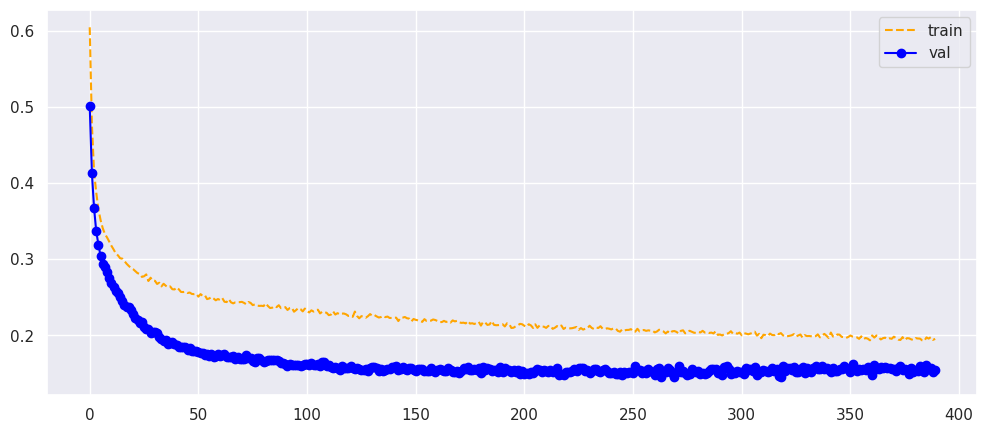

In [29]:
def plot_loss(Loss_train, Loss_val):
    plt.figure(figsize=(12, 5))
    plt.plot(range(len(Loss_train)), Loss_train, color='orange', label='train', linestyle='--')
    plt.plot(range(len(Loss_val)), Loss_val, color='blue', marker='o', label='val')
    plt.legend()
    plt.show()

plot_loss(clf.train_loss, clf.val_loss)

In [34]:
X_test_tensor = torch.tensor(X_test_std, dtype=torch.float32)

clf.best_model.eval()

with torch.no_grad():
    test_predictions = clf.best_model(X_test_tensor)
    # test_predictions = torch.sigmoid(test_predictions)
    test_predictions = (test_predictions > 0.5).int().numpy()

output_df = pd.DataFrame({
    'ID': df_test['ID'],
    'Satisfaction': test_predictions
})

output_df.to_csv('test_predictions.csv', index=False)
print("Предсказания сохранены в файл 'test_predictions.csv'")

output_df.head()

Предсказания сохранены в файл 'test_predictions.csv'


,ID,Satisfaction
0,98190,0
1,107961,0
2,129503,0
3,92408,0
4,117611,0
